In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generalization error

#### Question 1

In [2]:
delta = .05
for N in range(400000, 500000):
    eps = np.sqrt(8/N * np.log(4*(2*N)**10/delta))
    if eps <= 0.05:
        break
print('Sample size: ', N)

Sample size:  452957


#### Question 2

In [3]:
def vc_dim(N, dvc):
    return N**dvc

In [4]:
def vc_bound(N, dvc, delta):
    # VC bound
    return np.sqrt(8/N * np.log(4*vc_dim(2*N,dvc)/delta))

def rp_bound(N, dvc, delta):
    # Rademacher Penalty Bound
    return np.sqrt(2*np.log(2*N*vc_dim(N,dvc)*1.0)/N) + np.sqrt(2/N * np.log(1/delta)) + 1/N

def pvb(N, dvc, delta, eps):
    # Parrondo and Van den Broek
    return np.sqrt(1/N*(2*eps + np.log(6*vc_dim(2*N,dvc)/delta)))

def devroye(N, dvc, delta, eps):
    # Devroye bound
    return np.sqrt(1/2/N * (4*eps*(1+eps) + np.log(4/delta) + 2*dvc*np.log(N)))

In [5]:
#  For this problem, I refer to this link 
#  https://github.com/itacdonev/Learning_From_Data_Caltech/blob/master/HW4/HW4.ipynb
#  to get some insight about the epsilon bound calculation for specific N

N = 10000
delta = .05
dvc = 50

# finding maximum values for epsilons of PVB bound, at N = 10000
eps_pvb = .1 # random initial value for eps
while True:
    eps = pvb(N, dvc, delta, eps_pvb)
    if np.abs(eps - eps_pvb) < 1e-6:
        break
    eps_pvb = eps

# finding maximum values for epsilons of Devroye bound, at N = 10000
eps_d = .1 # random initial value for eps
while True:
    eps = devroye(N, dvc, delta, eps_d)
    if np.abs(eps - eps_d) < 1e-6:
        break
    eps_d = eps

print('eps of PVB = {}, eps of Devroye = {}'.format(eps_pvb, eps_d))

eps of PVB = 0.22369826895830314, eps of Devroye = 0.21522800300394265


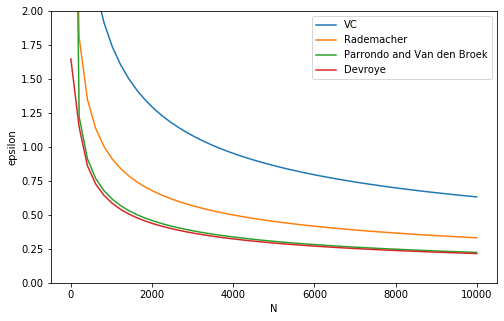

In [6]:
N = np.linspace(1, 10000)
plt.figure(figsize=(8, 5))
plt.plot(N, vc_bound(N, dvc, delta), label='VC')
plt.plot(N, rp_bound(N, dvc, delta), label='Rademacher')
plt.plot(N, pvb(N, dvc, delta, eps_pvb), label='Parrondo and Van den Broek')
plt.plot(N, devroye(N, dvc, delta, eps_d), label='Devroye')
plt.ylim(0, 2)
plt.xlabel('N')
plt.ylabel('epsilon')
plt.legend()
plt.show()

#### Question 3

In [7]:
N = 5
# finding maximum values for epsilons of PVB bound, at N = 5
eps_pvb = .1 # random initial value for eps
while True:
    eps = pvb(N, dvc, delta, eps_pvb)
    if np.abs(eps - eps_pvb) < 1e-6:
        break
    eps_pvb = eps

# finding maximum values for epsilons of Devroye bound, at N = 5
eps_d = .1 # random initial value for eps
while True:
    eps = devroye(N, dvc, delta, eps_d)
    if np.abs(eps - eps_d) < 1e-6:
        break
    eps_d = eps

print('eps of PVB = {}, eps of Devroye = {}'.format(eps_pvb, eps_d))

eps of PVB = 5.101361509107544, eps of Devroye = 5.593124554353451


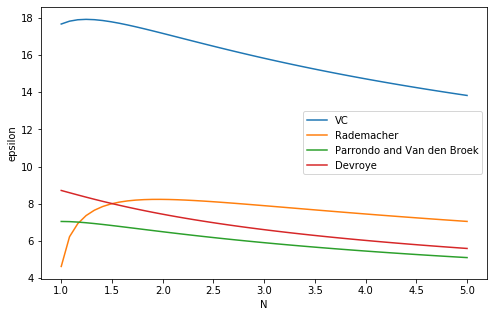

In [8]:
N = np.linspace(1, 5)
plt.figure(figsize=(8, 5))
plt.plot(N, vc_bound(N, dvc, delta), label='VC')
plt.plot(N, rp_bound(N, dvc, delta), label='Rademacher')
plt.plot(N, pvb(N, dvc, delta, eps_pvb), label='Parrondo and Van den Broek')
plt.plot(N, devroye(N, dvc, delta, eps_d), label='Devroye')
plt.xlabel('N')
plt.ylabel('epsilon')
plt.legend()
plt.show()

### Bias and variance

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
def generate_pairs(n_pairs=1, n_points=2):
    x_pairs, y_pairs = [], []
    for i in range(n_pairs):
        x = np.random.uniform(-1,1,n_points)
        y = np.sin(np.pi*x)
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        x_pairs.append(x)
        y_pairs.append(y)
    return x_pairs, y_pairs

#### Question 4

In [11]:
n_loops = 1000
w = []
x, y = generate_pairs(n_loops)
for i in range(n_loops):
    lr = LinearRegression(fit_intercept=False)
    lr.fit(x[i], y[i])
    w.append(lr.coef_[0][0])

w_mean = np.mean(w)
print('Mean hypothesis: g = {:.3f}x'.format(w_mean))

Mean hypothesis: g = 1.423x


#### Question 5, 6

In [12]:
x_test, y_test = generate_pairs(1, 100)
model_pred = w_mean * x_test[0]
bias = np.mean((model_pred - y_test)**2)
var = []
for i in range(n_loops):
    pred = w[i] * x_test[0]
    var.append(np.mean((model_pred - pred)**2))
var_avg = np.mean(var)
print('Bias: {}'.format(bias))
print('Variance: {}'.format(var_avg))

Bias: 0.3257891232373261
Variance: 0.28172146795123204


#### Question 7

In [13]:
n_samples = 10000
x, y = generate_pairs(n_samples)
x_test, y_test = generate_pairs(1, 100)
se = {'g1':[], 'g2': [], 'g3': [], 'g4': [], 'g5': []}
g1, g2, g3, g4, g5 = [], [], [], [], []
for i in range(n_samples):
    # g = b
    lr1 = LinearRegression(fit_intercept=True)
    lr1.fit(x[i]**0, y[i])
    g1.append(lr1.intercept_[0])
    pred1 = lr1.predict(x_test[0])
    se['g1'].append(np.mean((pred1 - y_test[0])**2))
    
    # g = ax
    lr2 = LinearRegression(fit_intercept=False)
    lr2.fit(x[i], y[i])
    g2.append(lr2.coef_[0][0])
    pred2 = lr2.predict(x_test[0])
    se['g2'].append(np.mean((pred2 - y_test[0])**2))
    
    # g = ax + b
    lr3 = LinearRegression(fit_intercept=True)
    lr3.fit(x[i], y[i])
    g3.append([lr3.intercept_[0], lr3.coef_[0][0]])
    pred3 = lr3.predict(x_test[0])
    se['g3'].append(np.mean((pred3 - y_test[0])**2))
    
    # g = ax^2
    lr4 = LinearRegression(fit_intercept=False)
    lr4.fit(x[i]**2, y[i])
    g4.append(lr4.coef_[0][0])
    pred4 = lr4.predict(x_test[0]**2)
    se['g4'].append(np.mean((pred4 - y_test[0])**2))
    
    # g = ax^2 + b
    lr5 = LinearRegression(fit_intercept=True)
    lr5.fit(x[i]**2, y[i])
    g5.append([lr5.intercept_[0], lr5.coef_[0][0]])
    pred5 = lr5.predict(x_test[0]**2)
    se['g5'].append(np.mean((pred5 - y_test[0])**2))

In [14]:
# x, y = generate(n_loops)
g1_avg_pred = np.mean(g1)
g2_avg_pred = np.mean(g2) * x_test[0]
g3_avg_pred = np.mean(g3,0)[0] + np.mean(g3,0)[1] * x_test[0]
g4_avg_pred = np.mean(g4) * x_test[0]**2
g5_avg_pred = np.mean(g5,0)[0] + np.mean(g5,0)[1] * x_test[0]**2

bias1 = np.mean((g1_avg_pred - y_test[0])**2)
bias2 = np.mean((g2_avg_pred - y_test[0])**2)
bias3 = np.mean((g3_avg_pred - y_test[0])**2)
bias4 = np.mean((g4_avg_pred - y_test[0])**2)
bias5 = np.mean((g5_avg_pred - y_test[0])**2)

var1, var2, var3, var4, var5 = [], [], [], [], []
for i in range(n_samples):
    h1_pred = g1[i]
    h2_pred = g2[i] * x_test[0]
    h3_pred = g3[i][0] + g3[i][1] * x_test[0]
    h4_pred = g4[i] * x_test[0]**2
    h5_pred = g5[i][0] + g5[i][1] * x_test[0]**2
    var1.append(np.mean((h1_pred - g1_avg_pred)**2))
    var2.append(np.mean((h2_pred - g2_avg_pred)**2))
    var3.append(np.mean((h3_pred - g3_avg_pred)**2))
    var4.append(np.mean((h4_pred - g4_avg_pred)**2))
    var5.append(np.mean((h5_pred - g5_avg_pred)**2))
    
var1 = np.mean(var1)
var2 = np.mean(var2)
var3 = np.mean(var3)
var4 = np.mean(var4)
var5 = np.mean(var5)


print('Model 1: bias = {:.3f}, variance = {:.3f}, expected OOS error: {:.5f}, actual OOS error: {:.5f}'
     .format(bias1, var1, bias1+var1, np.mean(se['g1'])))
print('Model 2: bias = {:.3f}, variance = {:.3f}, expected OOS error: {:.5f}, actual OOS error: {:.5f}'
     .format(bias2, var2, bias2+var2, np.mean(se['g2'])))
print('Model 3: bias = {:.3f}, variance = {:.3f}, expected OOS error: {:.5f}, actual OOS error: {:.5f}'
     .format(bias3, var3, bias3+var3, np.mean(se['g3'])))
print('Model 4: bias = {:.3f}, variance = {:.3f}, expected OOS error: {:.5f}, actual OOS error: {:.5f}'
     .format(bias4, var4, bias4+var4, np.mean(se['g4'])))
print('Model 5: bias = {:.3f}, variance = {:.3f}, expected OOS error: {:.5f}, actual OOS error: {:.5f}'
     .format(bias5, var5, bias5+var5, np.mean(se['g5'])))

Model 1: bias = 0.511, variance = 0.252, expected OOS error: 0.76393, actual OOS error: 0.76393
Model 2: bias = 0.282, variance = 0.215, expected OOS error: 0.49663, actual OOS error: 0.49663
Model 3: bias = 0.230, variance = 1.540, expected OOS error: 1.76949, actual OOS error: 1.76949
Model 4: bias = 0.510, variance = 8.977, expected OOS error: 9.48644, actual OOS error: 9.48644
Model 5: bias = 0.908, variance = 3302.594, expected OOS error: 3303.50188, actual OOS error: 3303.50188


### VC dimension
#### Question 8

In [15]:
from scipy.special import binom

def growth_func(N, q):
    # growth function
    inner_sum = 1
    for i in range(1, N):
        inner_sum -= binom(i, q)/2**(i+1)
    return 2**N * inner_sum

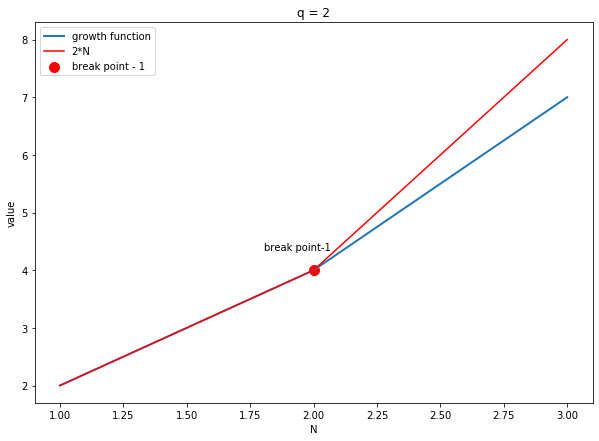

In [16]:
q = 2
gf = []
N = range(1, q+2)
for n in N:
    gf.append(growth_func(n, q))
        
plt.figure(figsize=(10, 7))
plt.plot(N, gf, label='growth function', linewidth=2)
plt.scatter(q, 2**q, s=100, label='break point - 1', c='r')
plt.plot(N, [2**n for n in N], label='2*N', c='r')

plt.annotate('break point-1', (q, 2**q), xytext=(-50, 20), textcoords='offset points')
plt.title('q = {}'.format(q))
plt.legend()
plt.xlabel('N')
plt.ylabel('value')
plt.show()

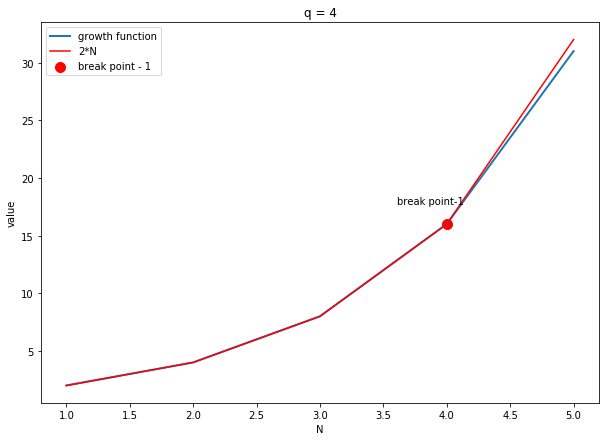

In [17]:
q = 4
gf = []
N = range(1, q+2)
for n in N:
    gf.append(growth_func(n, q))
        
plt.figure(figsize=(10, 7))
plt.plot(N, gf, label='growth function', linewidth=2)
plt.scatter(q, 2**q, s=100, label='break point - 1', c='r')
plt.plot(N, [2**n for n in N], label='2*N', c='r')

plt.annotate('break point-1', (q, 2**q), xytext=(-50, 20), textcoords='offset points')
plt.title('q = {}'.format(q))
plt.xlabel('N')
plt.ylabel('value')
plt.legend()
plt.show()